In [12]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
df = pd.read_csv("PreProcessedData.csv")
df
# Predicted Stress

,Unnamed: 0,Design,Direction,Displacement Rate,Stress,Strain
0,0,A,X,0.1,0.000006,0.000006
1,1,A,X,0.1,0.000035,0.000005
2,2,A,X,0.1,0.000465,0.000014
3,3,A,X,0.1,0.000192,0.000015
4,4,A,X,0.1,0.000379,0.000009
...,...,...,...,...,...,...
108737,108737,F,Y,1.8,18.729373,1.054368
108738,108738,F,Y,1.8,18.732007,1.054443
108739,108739,F,Y,1.8,18.730772,1.054470
108740,108740,F,Y,1.8,18.731807,1.054539


In [13]:
df.drop(columns=['Unnamed: 0'], axis=1)

,Design,Direction,Displacement Rate,Stress,Strain
0,A,X,0.1,0.000006,0.000006
1,A,X,0.1,0.000035,0.000005
2,A,X,0.1,0.000465,0.000014
3,A,X,0.1,0.000192,0.000015
4,A,X,0.1,0.000379,0.000009
...,...,...,...,...,...
108737,F,Y,1.8,18.729373,1.054368
108738,F,Y,1.8,18.732007,1.054443
108739,F,Y,1.8,18.730772,1.054470
108740,F,Y,1.8,18.731807,1.054539


<Axes: >

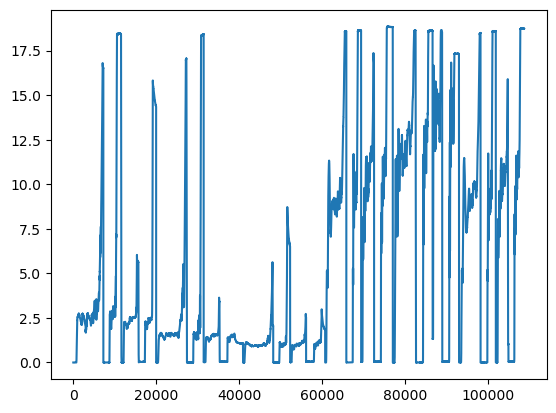

In [14]:
stress = df['Stress']
stress.plot()

In [15]:
def df_to_X_y(df, window_size ):  #5 in example
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)- window_size):
        row = [[a] for a in df_as_np[i: i + window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [16]:
WINDOW_SIZE = 10
X, y = df_to_X_y(stress, WINDOW_SIZE)
print(X.shape)
print(y.shape)

(108732, 10, 1)
(108732,)


In [17]:
X_train, y_train = X[:90000], y[:90000]
X_val, y_val = X[90000:99000], y[90000:99000]
X_test, y_test = X[99000:], y[99000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((90000, 10, 1), (90000,), (9000, 10, 1), (9000,), (9732, 10, 1), (9732,))

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((5, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
cp = ModelCheckpoint('model.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [20]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 18.1597 - root_mean_squared_error: 4.0365 - val_loss: 0.2080 - val_root_mean_squared_error: 0.4561
Epoch 2/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0562 - root_mean_squared_error: 0.2328 - val_loss: 0.1141 - val_root_mean_squared_error: 0.3378
Epoch 3/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0347 - root_mean_squared_error: 0.1822 - val_loss: 0.0883 - val_root_mean_squared_error: 0.2971
Epoch 4/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0302 - root_mean_squared_error: 0.1703 - val_loss: 0.0789 - val_root_mean_squared_error: 0.2809
Epoch 5/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0180 - root_mean_squared_error: 0.1297 - val_loss: 0.0744 - val_root_mean_squared_error: 0.2728
Epoch 6/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0133 - root_mean_squared_error: 0.0999 - val_loss: 0.0729 - val_root_mean_squared_error: 0.2700
Epoch 7/10
2813/2813 ━━━━━━━━━━━━━━━━━━

In [21]:
from tensorflow.keras.models import load_model
model = load_model('model.keras')

In [22]:
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': y_train})

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 578us/step


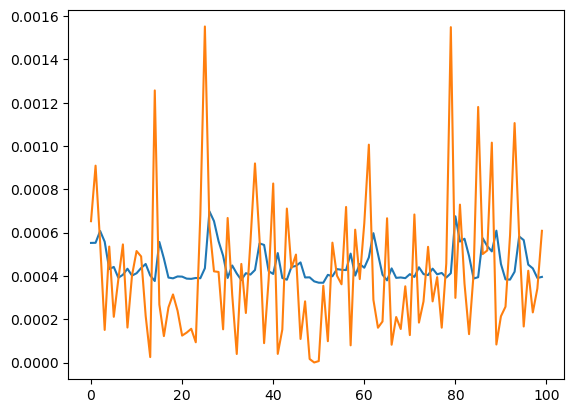

In [56]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])

In [24]:
val_predictions = model.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions, 'Actuals': y_val})
val_results

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step


,Val Predictions,Actuals
0,0.038442,0.037549
1,0.038249,0.038865
2,0.038763,0.036468
3,0.037941,0.039533
4,0.038856,0.036180
...,...,...
8995,0.000753,0.001002
8996,0.000743,0.001747
8997,0.000899,0.000535
8998,0.000714,0.000484


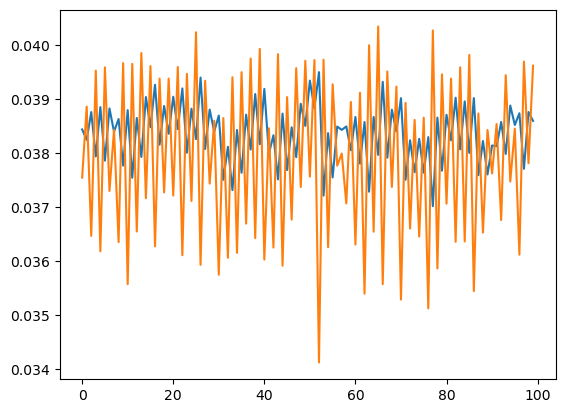

In [58]:
import matplotlib.pyplot as plt
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [26]:
test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_predictions, 'Actuals': y_test})
test_results

305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step


,Test Predictions,Actuals
0,0.000654,0.000754
1,0.000613,0.001157
2,0.000682,0.001158
3,0.000728,0.001301
4,0.000789,0.000785
...,...,...
9727,18.733959,18.729373
9728,18.732113,18.732007
9729,18.733320,18.730772
9730,18.732882,18.731807


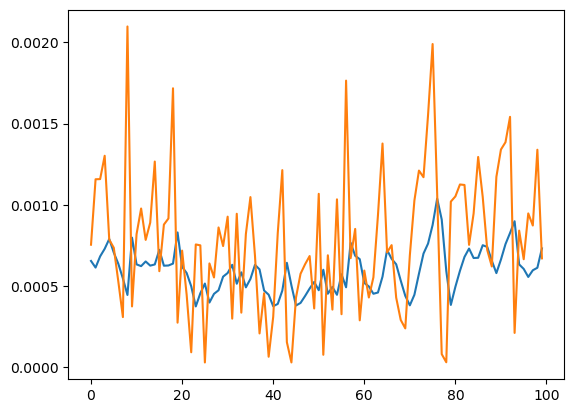

In [60]:
import matplotlib.pyplot as plt
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])